In [1]:
%matplotlib inline
import os, pickle, glob
import cv2
import matplotlib
import numpy as np
import FileIO as fio
import Camera as camsolve
from matplotlib import pyplot as plt
from matplotlib import patches as ptch
plt.style.use("ggplot")

In [2]:
from collections import defaultdict

In [3]:
root_path = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831/"

In [4]:
subj = "liyan"
take = "action_01"

In [5]:
ts_file = "{:}/{:}_{:}_timestamp.txt".format(root_path, subj, take)
img_dir = "{:}/{:}_{:}".format(root_path, subj, take)
img_list = glob.glob("{:}/*.bmp.lz4".format(img_dir))

In [10]:
global_cam_ts = {"00": [], "01": [], "02": []}
local_cam_ts = {"00": [], "01": [], "02": []}
global_ts_to_cam_ts = defaultdict(dict)
imgfile_timestamp = {"00": [], "01": [], "02": []}

In [11]:
with open(ts_file, "r") as f:
    for line in f:
        cam, _, glob_ts, color_ts, depth_ts = line.strip().split()
        global_cam_ts[cam].append(int(glob_ts))
        local_cam_ts[cam].append(float(color_ts) * 1000.0)
        global_ts_to_cam_ts[int(glob_ts)][cam] = float(color_ts) * 1000.0

In [12]:
for imgf in img_list:
    cam, glob_ts, imgid = os.path.basename(imgf).split(".")[0].split("-")
    imgfile_timestamp[cam].append((imgf, global_ts_to_cam_ts[int(glob_ts)][cam]))

In [13]:
for cam in imgfile_timestamp:
    imgfile_timestamp[cam].sort(key=lambda x: x[1])

[('/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831//liyan_action_01/00-000006384-000000001.bmp.lz4',
  1350604.126),
 ('/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831//liyan_action_01/00-000006421-000000006.bmp.lz4',
  1350630.737),
 ('/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831//liyan_action_01/00-000006455-000000009.bmp.lz4',
  1350657.471),
 ('/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831//liyan_action_01/00-000006485-000000011.bmp.lz4',
  1350684.204),
 ('/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831//liyan_action_01/00-000006515-000000014.bmp.lz4',
  1350710.815),
 ('/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831//liyan_action_01/00-000006546-000000016.bmp.lz4',
  1350737.4270000001),
 ('/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831//liyan_action_01/00-000006585-000000020.bmp.lz4',
  1350764.16),
 ('/home/liyanc/Desktop/raid/scratc

In [41]:
glob_ts_int = {"00": [], "01": [], "02": []}
local_ts_int = {"00": [], "01": [], "02": []}
for k in global_cam_ts:
    global_cam_ts[k].sort()
    for ind in range(len(global_cam_ts[k]) - 1):
        glob_ts_int[k].append(global_cam_ts[k][ind + 1] - global_cam_ts[k][ind])
    glob_ts_int[k] = np.array(glob_ts_int[k])
    
for k in local_cam_ts:
    local_cam_ts[k].sort()
    for ind in range(len(local_cam_ts[k]) - 1):
        local_ts_int[k].append(local_cam_ts[k][ind + 1] - local_cam_ts[k][ind])
    local_ts_int[k] = np.array(local_ts_int[k])

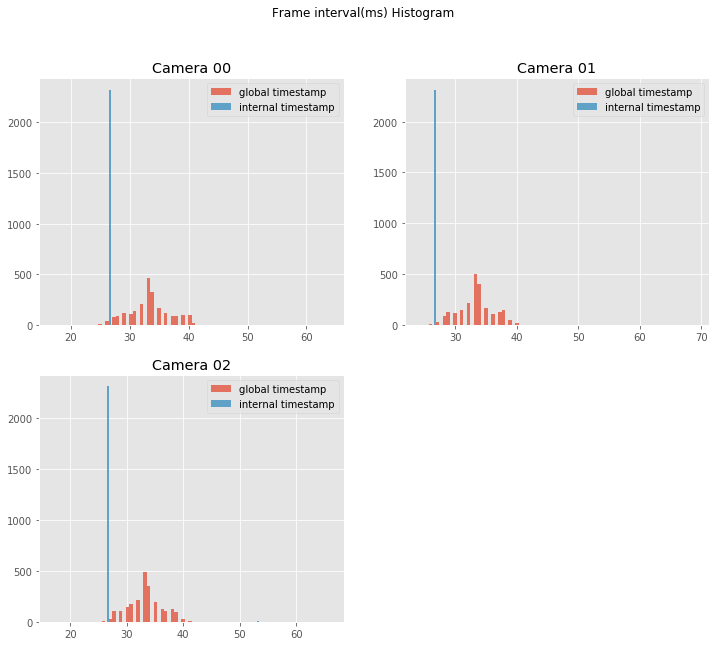

In [45]:
fig = plt.figure(figsize=(12, 10))
for cam, plotid in [("00", 1), ("01", 2), ("02", 3)]:
    ax = plt.subplot(2, 2, plotid)
    ax.hist(glob_ts_int[cam], bins=80, alpha=0.75, label="global timestamp")
    ax.hist(local_ts_int[cam], bins=80, alpha=0.75, label="internal timestamp")
    ax.legend()
    ax.set_title("Camera {:}".format(cam))
fig.suptitle("Frame interval(ms) Histogram")
plt.savefig("frame_interval.png")

In [46]:
np.mean(local_ts_int[cam][local_ts_int[cam] <  30.0])

26.666630802603024